# Exploración inicial de datos farmacéuticos

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración para visualización
plt.style.use('seaborn-v0_8')


In [2]:

# Cargar dataset de muestra procesado (previamente generado)
df = pd.read_csv("/content/demoDatosProcesados.csv")

print("Filas cargadas:", len(df))
df.head()


Filas cargadas: 49


,ClienteID,NombreCliente,Edad,Ciudad,ProductoID,NombreProducto,CategoríaProducto,FechaCompra,Cantidad,PrecioUnitario,TotalVenta
0,C00001,Mtro. Modesto Hurtado,31,Nueva Paraguay,P485,Magnesio,Suplemento,2025-04-05,5,70.39,351.95
1,C00002,Hugo Marisela Trujillo,76,San Luis Manuel los bajos,P398,Cetirizina,Antihistamínico,2024-12-18,1,116.89,116.89
2,C00003,Rosa Eugenia Portillo,18,San Aida los altos,P353,Diclofenaco,Analgésico,2024-06-21,2,152.11,304.22
3,C00004,Alfredo Regalado,42,San Luis Manuel los bajos,P349,Fexofenadina,Antihistamínico,2024-08-21,5,37.37,186.85
4,C00005,Beatriz Irene Toro Serrano,35,San Cristian los altos,P284,Ranitidina,Antiácido,2024-10-07,3,66.73,200.19


In [3]:

# Información del DataFrame
df.info()

# Revisión de nulos
print("\nNulos por columna:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ClienteID          49 non-null     object 
 1   NombreCliente      49 non-null     object 
 2   Edad               49 non-null     int64  
 3   Ciudad             49 non-null     object 
 4   ProductoID         49 non-null     object 
 5   NombreProducto     49 non-null     object 
 6   CategoríaProducto  49 non-null     object 
 7   FechaCompra        49 non-null     object 
 8   Cantidad           49 non-null     int64  
 9   PrecioUnitario     49 non-null     float64
 10  TotalVenta         49 non-null     float64
dtypes: float64(2), int64(2), object(7)
memory usage: 4.3+ KB

Nulos por columna:
ClienteID            0
NombreCliente        0
Edad                 0
Ciudad               0
ProductoID           0
NombreProducto       0
CategoríaProducto    0
FechaCompra          0
Cantida

In [4]:

# Crear KPIs iniciales
kpis = {
    "Ventas Totales": df["TotalVenta"].sum(),
    "Número de Transacciones": len(df),
    "Ticket Promedio": df["TotalVenta"].mean(),
    "Clientes Únicos": df["ClienteID"].nunique(),
    "Productos Únicos": df["ProductoID"].nunique()
}

pd.DataFrame.from_dict(kpis, orient="index", columns=["Valor"])


,Valor
Ventas Totales,14154.740000
Número de Transacciones,49.000000
Ticket Promedio,288.872245
Clientes Únicos,49.000000
Productos Únicos,44.000000


In [12]:
# KPIS

# Ventas Totales
ventas_totales = df["TotalVenta"].sum()

# Número de Transacciones
num_transacciones = len(df)

# Ticket Promedio
ticket_promedio = ventas_totales / num_transacciones if num_transacciones > 0 else 0

# Clientes Únicos
clientes_unicos = df["ClienteID"].nunique()

# Ventas por Categoría
ventas_categoria = df.groupby("CategoríaProducto")["TotalVenta"].sum().sort_values(ascending=False)

# Top 5 Productos por ventas
top_productos = df.groupby("NombreProducto")["TotalVenta"].sum().sort_values(ascending=False).head(5)

# % Ventas por Ciudad
ventas_ciudad = df.groupby("Ciudad")["TotalVenta"].sum()
porcentaje_ciudad = (ventas_ciudad / ventas_totales * 100).sort_values(ascending=False)

# Mostrar resultados
print("KPIs preliminares")
print(f"Ventas Totales: ${ventas_totales:,.2f}")
print(f"Número de Transacciones: {num_transacciones}")
print(f"Ticket Promedio: ${ticket_promedio:,.2f}")
print(f"Clientes Únicos: {clientes_unicos}\n")

print("Ventas por Categoría:")
print(ventas_categoria, "\n")

print("Top 5 Productos más vendidos:")
print(top_productos, "\n")

print("Porcentaje de ventas por Ciudad:")
print(porcentaje_ciudad)


KPIs preliminares
Ventas Totales: $14,154.74
Número de Transacciones: 49
Ticket Promedio: $288.87
Clientes Únicos: 49

Ventas por Categoría:
CategoríaProducto
Antihistamínico    3252.26
Antidiabético      2809.95
Antiácido          2587.15
Analgésico         2077.86
Suplemento         2044.32
Antibiótico        1383.20
Name: TotalVenta, dtype: float64 

Top 5 Productos más vendidos:
NombreProducto
Glibenclamida    1642.66
Diclofenaco      1238.54
Desloratadina    1165.66
Ranitidina       1113.23
Fexofenadina     1079.10
Name: TotalVenta, dtype: float64 

Porcentaje de ventas por Ciudad:
Ciudad
San Octavio los altos                           6.843291
San Javier los altos                            6.303542
San Elisa los altos                             5.281058
Nueva Bahrein                                   5.208432
San Flavio los altos                            4.705138
San Timoteo los bajos                           4.612589
Vieja Bolivia                                   4.103926


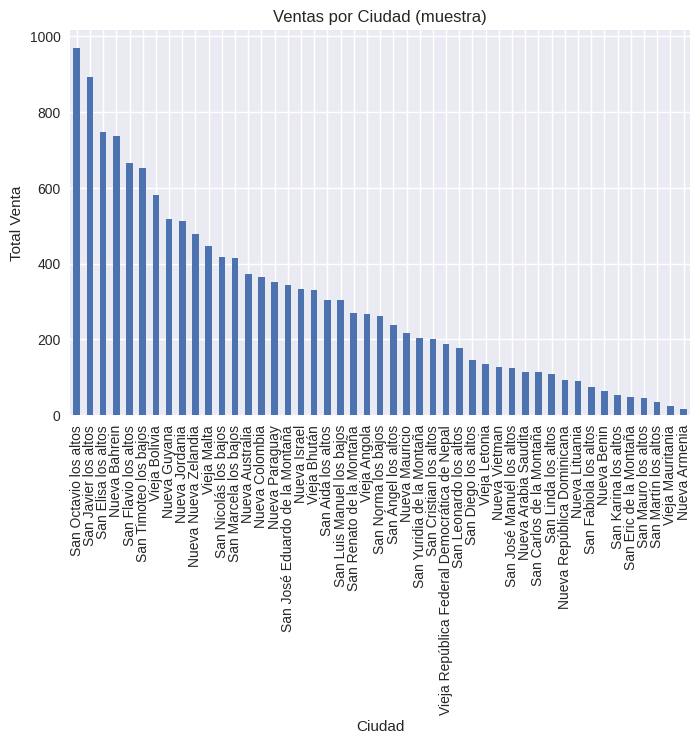

In [5]:

ventas_ciudad = df.groupby("Ciudad")["TotalVenta"].sum().sort_values(ascending=False)
ventas_ciudad.plot(kind="bar", figsize=(8,5))
plt.title("Ventas por Ciudad (muestra)")
plt.ylabel("Total Venta")
plt.xticks(rotation=90)
plt.show()


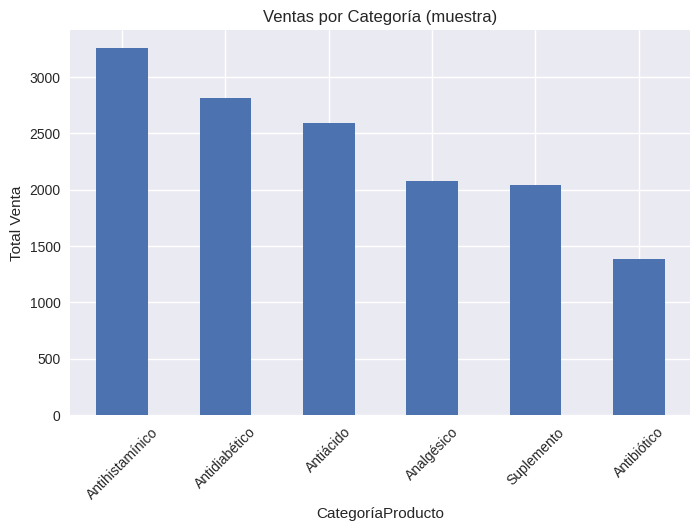

In [9]:

ventas_categoria = df.groupby("CategoríaProducto")["TotalVenta"].sum().sort_values(ascending=False)
ventas_categoria.plot(kind="bar", figsize=(8,5))
plt.title("Ventas por Categoría (muestra)")
plt.ylabel("Total Venta")
plt.xticks(rotation=45)
plt.show()


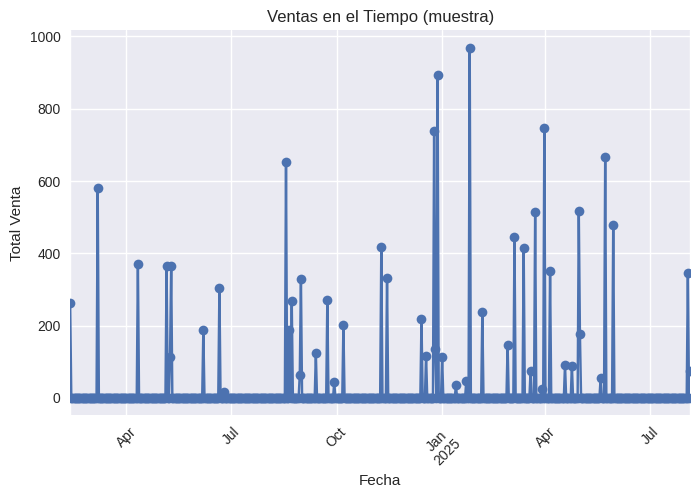

In [11]:

df["FechaCompra_parsed"] = pd.to_datetime(df["FechaCompra"], errors="coerce")
ventas_tiempo = df.groupby(pd.Grouper(key="FechaCompra_parsed", freq="D"))["TotalVenta"].sum()

ventas_tiempo.plot(figsize=(8,5), marker="o")
plt.title("Ventas en el Tiempo (muestra)")
plt.ylabel("Total Venta")
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.show()
